'''
Data Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
'''

#### 2011년 1월 ~ 2012년 12월
* 날짜,/시간, 기온, 습도, 풍속 등의 정보를 기반으로 1시간 간격 동안의 자전거 대여 횟수가 기재되어 있음<br>
* datetime: hourly date + timestamp  
* season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
* holiday: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날  
* workingday: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일  
* weather:  
    1 = 맑음, 약간 구름 낀 흐림  
    2 = 안개, 안개 + 흐림  
    3 = 가벼운 눈, 가벼운 비 + 천둥  
    4 = 심한 눈/비, 천둥/번개  
* temp: 온도(섭씨)   
* atemp: 체감온도(섭씨)  
* humidity: 상대습도  
* windspeed: 풍속  
* casual: 사전에 등록되지 않는 사용자가 대여한 횟수  
* registered: 사전에 등록된 사용자가 대여한 횟수  
* count: 대여 횟수


In [6]:
# 폰트
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

# 경고무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

# 1. 데이터로드

In [10]:
bike_df = pd.read_csv('data/train.csv')
bike_df.shape # 10886 x 12
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [11]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [13]:
np.sum(bike_df.isnull()) # null 없음

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 1-1. datatime 타입 변경
- object타입을 datetime타입으로

In [16]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [17]:
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


## 1-2. datetime에서 년,월,일,시간 추출

In [19]:
bike_df['year'] = bike_df.datetime.apply(lambda x:x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x:x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x:x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x:x.hour)
print(bike_df.info())
bike_df.tail(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23


In [24]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [25]:
bike_df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1


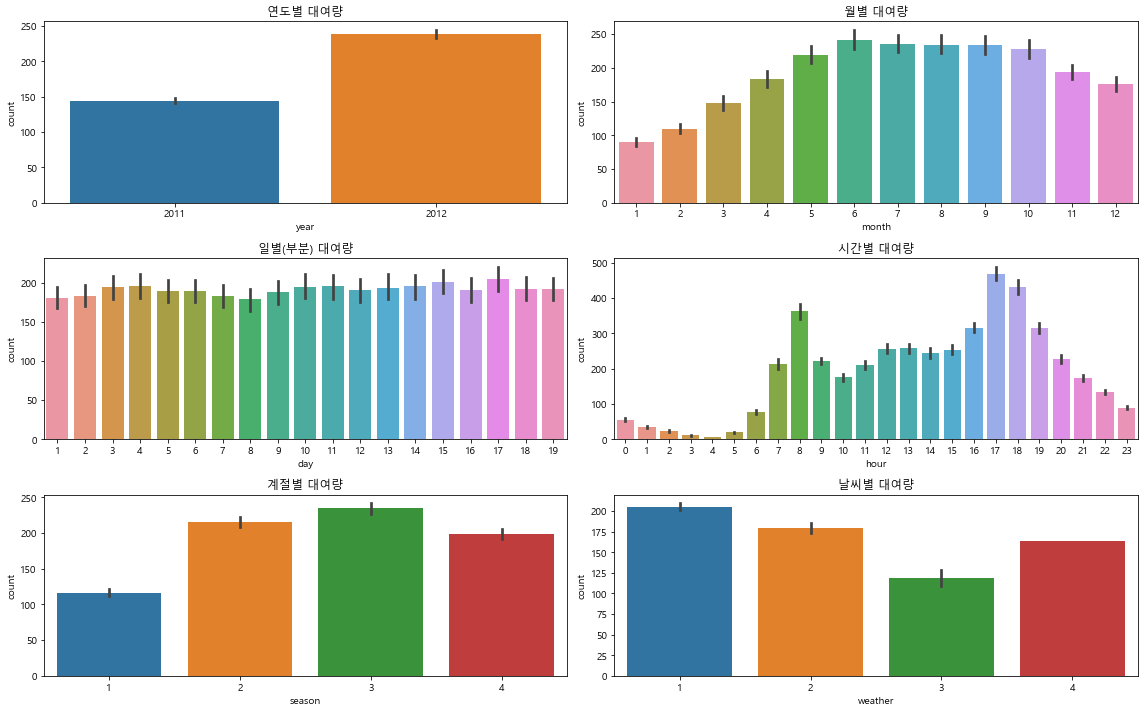

In [27]:
import seaborn as sns
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(16,10)

sns.barplot(data=bike_df, x="year", y="count", ax=ax1)
sns.barplot(data=bike_df, x="month", y="count", ax=ax2)
sns.barplot(data=bike_df, x="day", y="count", ax=ax3)
sns.barplot(data=bike_df, x="hour", y="count", ax=ax4)
sns.barplot(data=bike_df, x="season", y="count", ax=ax5)
sns.barplot(data=bike_df, x="weather", y="count", ax=ax6)

ax1.set(title="연도별 대여량")
ax2.set(title="월별 대여량")
ax3.set(title="일별(부분) 대여량")
ax4.set(title="시간별 대여량")
ax5.set(title="계절별 대여량")
ax6.set(title="날씨별 대여량")
plt.tight_layout()

## 1-3. MSE, RMSE, RMSLE 생성

### 로그 변환, 피처 인코딩, 모델 학습/예측/평가 
* https://www.kaggle.com/c/bike-sharing-demand/overview/evaluation
* RMSLE(실제 값과 예측값의 오류를 로그로 변환한 뒤 RMSE를 적용)
* Score : RMSLE(Root Mean Squared Logarithmic Error), 과대평가된 항목보다 과소평가 된 항목에 페널티를 준다. 0에 가까울 수록 정밀도가 높다.

* MAE: 실제값 예측값 절대값 차이
* MSE: 실제값 예측값 차이 제곱 평균
* RMSE: MSE의 루트.
* RMSLE: RMSE에 로그.


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred): # RMSLE는 sklearn에 없음
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred): # RMSE 
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    
    mse_val = mean_absolute_error(y, pred)
    print(f'MSE: {mse_val : .3f}, RMSE:{rmse_val : .3f}, RMSLE: {rmsle_val : .3f} ')

## 1-4. 선형회귀의 mse, rmse, rmsle

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features
                                                   ,y_target
                                                   ,test_size=0.3
                                                   ,random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test, pred)
# MSE:  105.924, RMSE: 140.900, RMSLE:  1.165 

MSE:  105.924, RMSE: 140.900, RMSLE:  1.165 


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """


In [49]:
# 상위 n_tops 개수만큼만 보겠다.
def get_top_error_data(y_test, pred, n_tops=5):
    # DataFrame에 컬럼들이 실제 대여횟수(count)와 예측 값을 서로 비교할 수 있도록
    result_df = pd.DataFrame(y_test.values
                            ,columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff',ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


## 1-5. 한쪽으로 치우쳐져 있는 데이터 정규화

<AxesSubplot:>

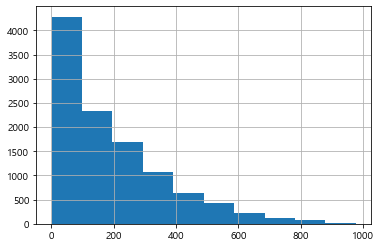

In [50]:
y_target.hist() # 데이터가 한쪽으로

<AxesSubplot:>

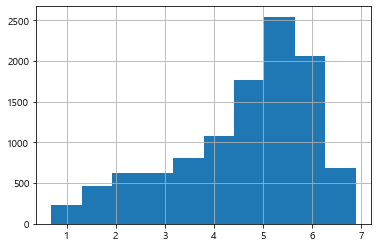

In [52]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [55]:
# 터갯 컬럼인 count 값을 log1p로 log변환
y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features
                                                   ,y_target_log
                                                   ,test_size=0.3
                                                   ,random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target값은 Log변환, expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값도 log 변환된 타겟 기반으로 학습되어 예측 후 exmpl으로 scale변환
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)
# MSE:  105.924, RMSE: 140.900, RMSLE:  1.165 (스케일 전)
# MSE:  109.286, RMSE: 162.594, RMSLE:  1.017 (스케일 후) 별로 개선안됨.

MSE:  109.286, RMSE: 162.594, RMSLE:  1.017 


> log스케일 했지만, 별로 개선안됨

## 1-6. 회귀 계수 확인해보자
- 위애 log스케일 했지만, 개선이 별로 안됨

<AxesSubplot:>

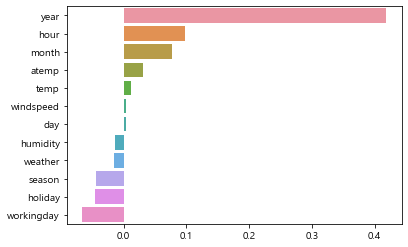

In [57]:
# year의 회귀계수 값이 크다
coef = pd.Series(lr_reg.coef_
                ,index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

## 1-7. 년, 월, 시간, 주중주말, 계절, 날씨 를 원핫벡터로 범주형으로 바꿈

In [59]:
X_features_ohe = pd.get_dummies(X_features
                               ,columns=['year','month','hour','holiday'
                                            ,'workingday','season','weather'])
X_features_ohe.head()

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0


## 1-8. 선형, Ridge, Lasso로 모델 평가
- 숫자였을때보다, 년,월,일 등 특정 컬럼들을 범주형으로 변경하여 모델에 넣음
    - 회귀모형들의 성능이 좋아졌다.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test,is_expm1=True)


### LinearRegression ###
MSE:  63.106, RMSE: 97.483, RMSLE:  0.589 
### Ridge ###
MSE:  63.648, RMSE: 98.407, RMSLE:  0.589 
### Lasso ###
MSE:  72.658, RMSE: 113.031, RMSLE:  0.634 


<AxesSubplot:>

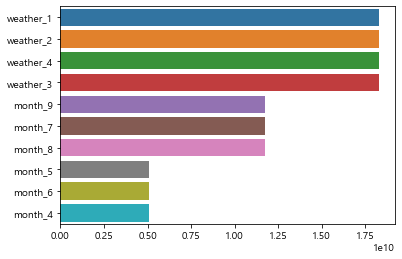

In [61]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

## 1-9. XGBoost, lightgbm 모델사용

In [67]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model
                     ,X_train
                     ,X_test
                     ,y_train
                     ,y_test
                     ,is_expm1=True)

### RandomForestRegressor ###
MSE:  31.401, RMSE: 50.533, RMSLE:  0.353 
### GradientBoostingRegressor ###
MSE:  34.352, RMSE: 55.805, RMSLE:  0.341 
### XGBRegressor ###
MSE:  30.891, RMSE: 50.950, RMSLE:  0.339 
### LGBMRegressor ###
MSE:  28.777, RMSE: 46.473, RMSLE:  0.316 


# 2. 테스트데이트에 넣어보자.

In [75]:
X_train.head()

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
8620,32.80,37.120,52,11.0014,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
8985,32.80,35.605,36,0.0000,16,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
6171,4.92,6.820,50,12.9980,13,0,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
6473,11.48,13.635,61,15.0013,6,0,1,0,0,1,...,0,1,1,0,0,0,1,0,0,0
10877,17.22,21.210,50,19.0012,19,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [74]:
real_test = pd.read_csv('data/test.csv')
real_test.shape # 6493 x 9
real_test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [76]:
real_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 2-1. datetime
- 타입변경 object -> pd.datatime
- 년 월 일 시간 으로 분리
- datetime drop

In [78]:
real_test['datetime'] = real_test.datetime.apply(pd.to_datetime)
real_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [79]:
real_test['year']= real_test.datetime.apply(lambda x:x.year)
real_test['month']= real_test.datetime.apply(lambda x:x.month)
real_test['day']= real_test.datetime.apply(lambda x:x.day)
real_test['hour']= real_test.datetime.apply(lambda x:x.hour)
real_test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2


In [80]:
drop_columns = ['datetime']
real_test.drop(drop_columns, axis=1, inplace=True)
real_test.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1


In [81]:
real_test_ohe = pd.get_dummies(real_test
                              ,columns=['year','month','hour','holiday'
                                           ,'workingday','season','weather'])
real_test.shape # 6493 x 12
real_test_ohe.head(2) # 6493 x 55

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,10.66,11.365,56,26.0027,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
1,10.66,13.635,56,0.0000,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0


In [83]:
real_test_ohe

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,10.66,11.365,56,26.0027,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
1,10.66,13.635,56,0.0000,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
2,10.66,13.635,56,0.0000,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
3,10.66,12.880,56,11.0014,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
4,10.66,12.880,56,11.0014,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,10.66,12.880,60,11.0014,31,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
6489,10.66,12.880,60,11.0014,31,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
6490,10.66,12.880,60,11.0014,31,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
6491,10.66,13.635,56,8.9981,31,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0


## 2-2. 선형회귀, Ridge, Lasso 모델사용

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test,is_expm1=True)


## 2-3. XGBoost, lightgbm 모델사용

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model
                     ,X_train
                     ,X_test
                     ,y_train
                     ,y_test
                     ,is_expm1=True)